In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
df_movies = pd.read_csv("../data/raw/tmdb_5000_movies.csv")
df_credits = pd.read_csv("../data/raw/tmdb_5000_credits.csv")

In [4]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Merge into one df and prepare data

In [6]:
df_movies = df_movies.merge(df_credits, left_on='id', right_on='movie_id')

# drop redundant columns
df = df_movies[['id', 'original_title', 'overview', 'genres', 'keywords', 
                'vote_average', 'vote_count', 'popularity', 'release_date', 'original_language']]


df = df[df['original_language'] == 'en']

df = df.dropna(subset=['overview'])

# the genres and keyworsd columns are string representation of lists
df['genres'] = df['genres'].apply(json.loads)
df['keywords'] = df['keywords'].apply(json.loads)

def get_list(x):
    names = [i['name'] for i in x]
    return names

df['genres_list'] = df['genres'].apply(get_list)
df['keywords_list'] = df['keywords'].apply(get_list)

df['content'] = df['original_title'] + ': ' + df['overview']

print(f"Final df size: {df.shape[0]} movies")
df[['original_title', 'content', 'genres_list', 'overview']].head()

Final df size: 4504 movies


,original_title,content,genres_list,overview
0,Avatar,"Avatar: In the 22nd century, a paraplegic Mari...","[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End: Capt...,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha..."
2,Spectre,Spectre: A cryptic message from Bond’s past se...,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,The Dark Knight Rises: Following the death of ...,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...
4,John Carter,"John Carter: John Carter is a war-weary, forme...","[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca..."


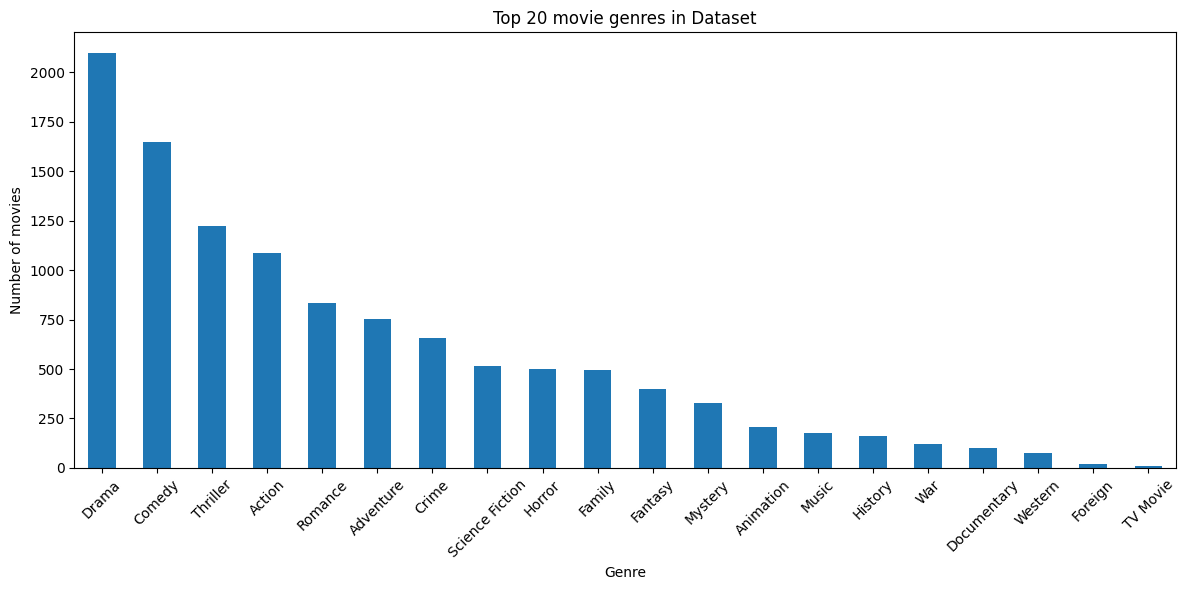

In [7]:
all_genres = df['genres_list'].explode()
plt.figure(figsize=(12, 6))
all_genres.value_counts().head(20).plot(kind='bar')
plt.title('Top 20 movie genres in Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../data/results/top5_genres_indata.png', dpi=150, bbox_inches='tight')
plt.show()


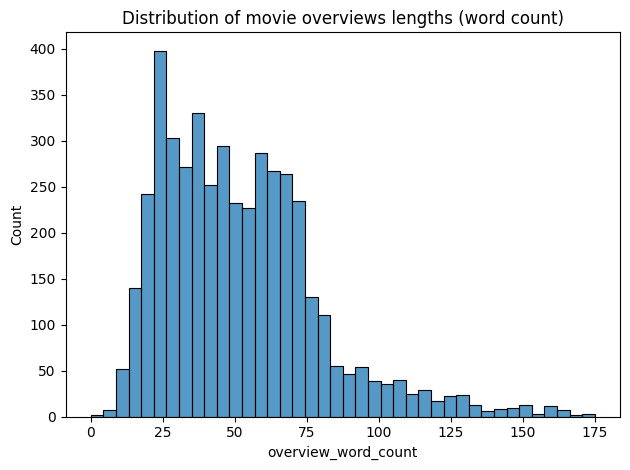

In [8]:
df['overview_word_count'] = df['overview'].apply(lambda x: len(str(x).split()))
sns.histplot(df['overview_word_count'])
plt.title('Distribution of movie overviews lengths (word count)')

plt.tight_layout()
plt.savefig('../data/results/plot_summary_dist.png', dpi=150, bbox_inches='tight')
plt.show()

In [9]:
df.to_pickle("../data/processed/en_movies_processed.pkl")